In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import acf, pacf, ARIMA, ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import arma2ma
import pmdarima as pm

In [2]:
horizon = pd.read_csv(".\\data\\horizon_final.csv", encoding="utf-8")["幀率 [FPS]"]
horizon.head()

0    113
1    146
2    147
3    150
4    152
Name: 幀率 [FPS], dtype: int64

In [3]:
horizon = horizon.to_numpy()
print(horizon.size)

3193


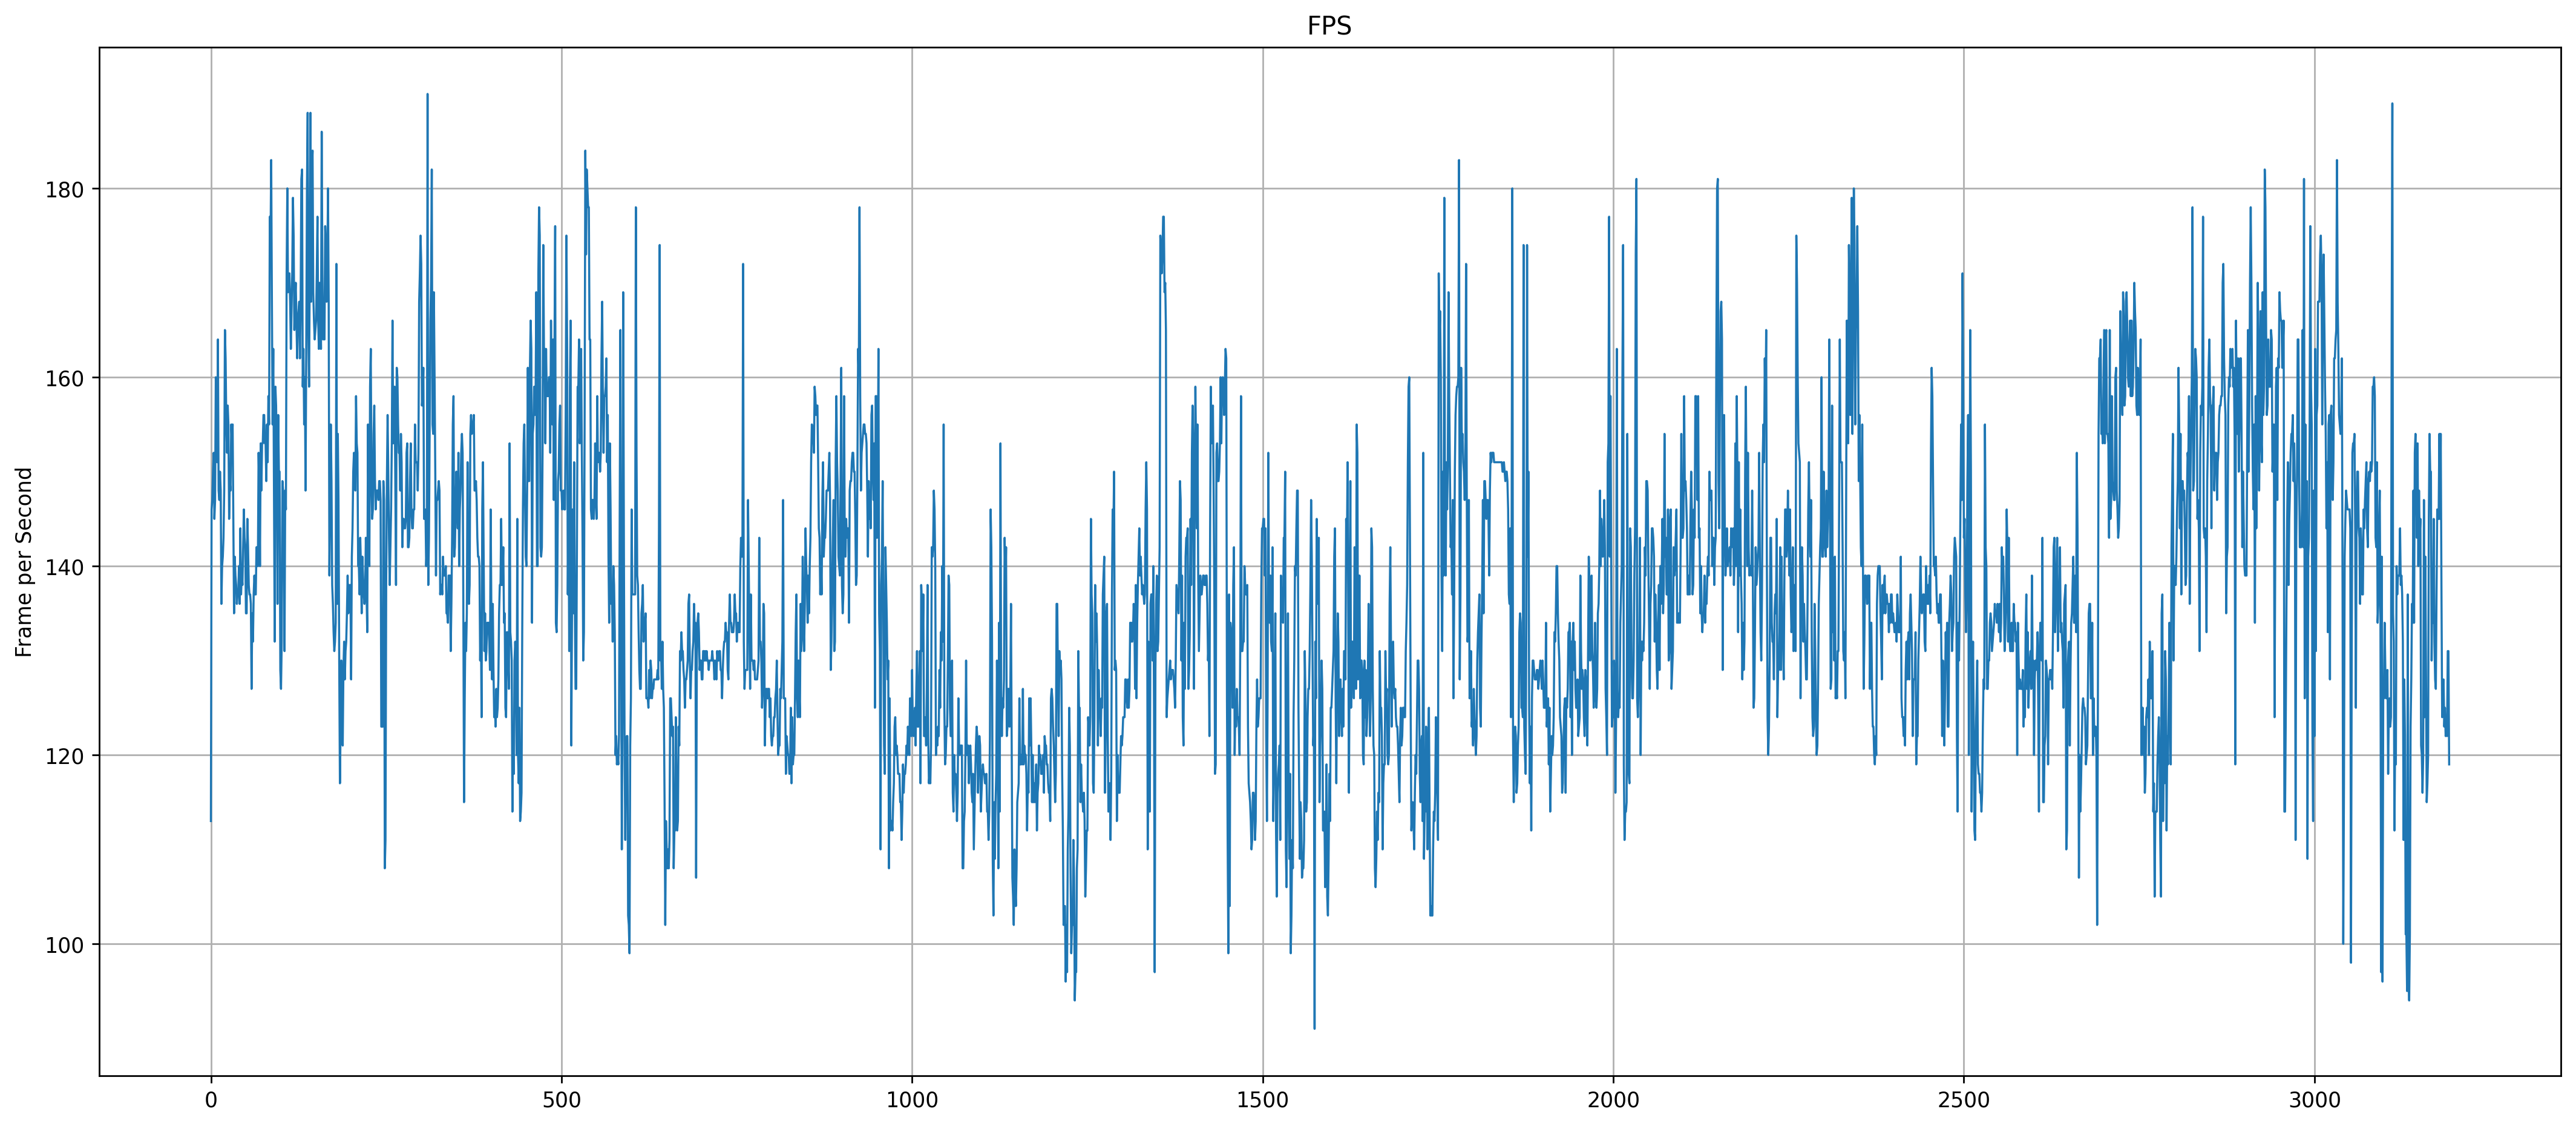

In [4]:
plt.figure(figsize=(21, 9), dpi=250)
plt.plot(horizon, linewidth=1)
plt.title("FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

In [5]:
# fig_fps, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(21,18), dpi=300)


# ax1.plot(horizon, linewidth=1)
# ax1.set_title("FPS")
# ax1.grid()

# ax2.plot(np.diff(horizon), linewidth=1)
# ax2.set_title("First Order Difference of Frame per Second")
# ax2.grid()

In [6]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(horizon)
print(f"test statistic: {adf}", f"\np-value: {pvalue}", f"\nThe number of lags used: {usedlag}", sep="")
print(f"The number of observations used: {nobs}")
print(f"Critical Value(1%): {critical_values['1%']}", f"\nCritical Value(5%): {critical_values['5%']}",
      f"\nCritical Value(10%): {critical_values['10%']}", sep="")

test statistic: -6.022526373754235
p-value: 1.482038942115498e-07
The number of lags used: 17
The number of observations used: 3175
Critical Value(1%): -3.4324112897035914
Critical Value(5%): -2.8624507519733178
Critical Value(10%): -2.567254814086428


In [7]:
acf(horizon)

array([1.        , 0.77850348, 0.66561877, 0.60431277, 0.57805787,
       0.54684458, 0.52749405, 0.50566324, 0.48444691, 0.46329546,
       0.45760109, 0.45077577, 0.44045751, 0.42509288, 0.4206721 ,
       0.4156934 , 0.41228562, 0.40922882, 0.40718972, 0.39461159,
       0.3803871 , 0.37251867, 0.37384017, 0.35868221, 0.35391058,
       0.34775985, 0.34567993, 0.34033613, 0.33487569, 0.32683294,
       0.32844588, 0.32274719, 0.31413724, 0.30276544, 0.29214614,
       0.28333638])

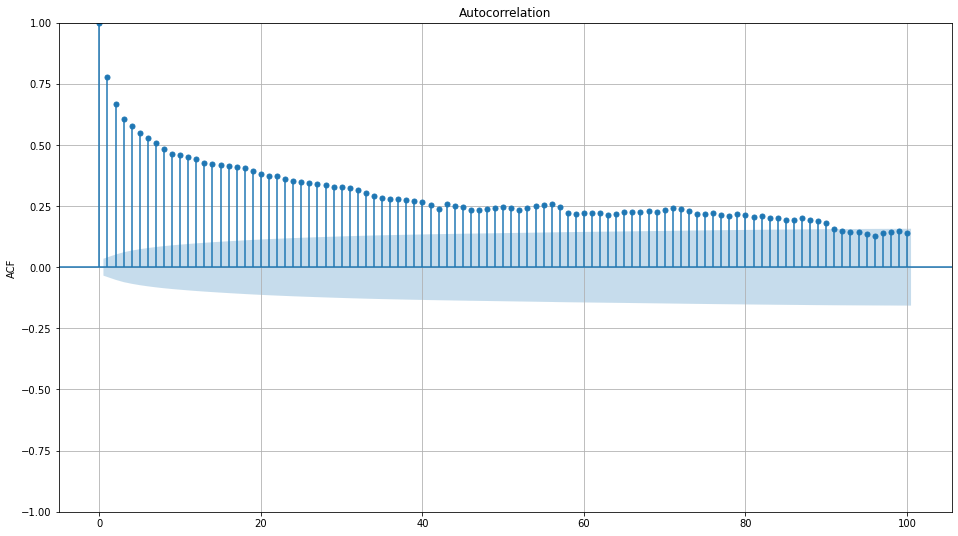

In [8]:
fig_acf, ax_acf = plt.subplots(figsize=(16,9))
plot_acf(horizon, lags=100, alpha=0.05, ax=ax_acf)
plt.ylabel("ACF")
plt.grid()
plt.show()

In [9]:
pacf(horizon)

array([ 1.00000000e+00,  7.78747374e-01,  1.51411772e-01,  1.21782726e-01,
        1.27042832e-01,  5.82324346e-02,  7.24723810e-02,  4.18230645e-02,
        3.13085411e-02,  2.32811045e-02,  5.52724352e-02,  3.77806123e-02,
        2.55701543e-02,  1.19727589e-02,  3.81425469e-02,  2.72033309e-02,
        2.92517669e-02,  2.90028170e-02,  2.78922410e-02, -7.94929902e-04,
       -2.23663093e-03,  1.23921771e-02,  2.97497979e-02, -1.83526875e-02,
        2.01027427e-02,  7.78021663e-03,  1.67000389e-02,  9.33271611e-03,
        5.00651213e-03, -3.15400863e-04,  2.67128334e-02,  1.76239354e-03,
       -5.82014558e-03, -1.00356945e-02, -1.00831548e-02, -3.60770110e-03])

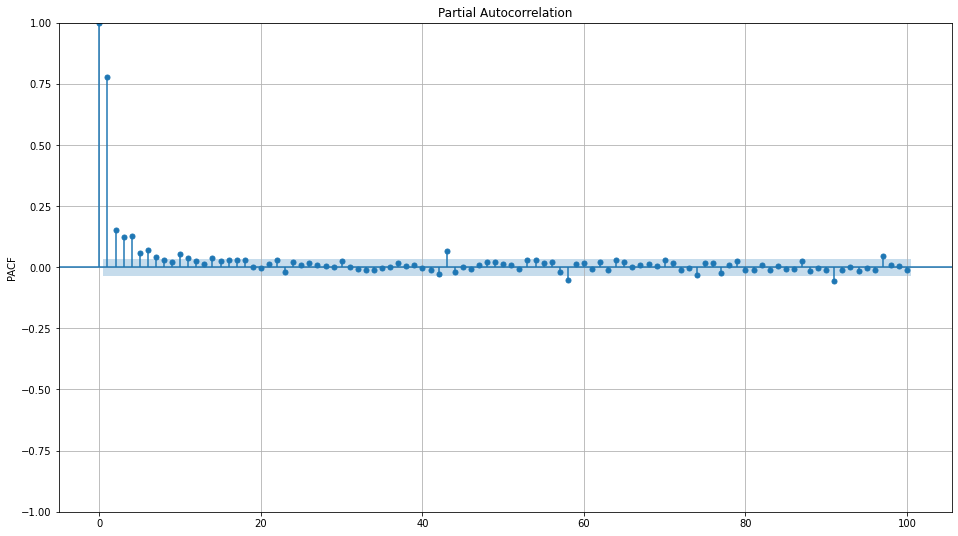

In [10]:
fig_pacf, ax_pacf = plt.subplots(figsize=(16,9))
plot_pacf(horizon, lags=100, alpha=0.05, ax=ax_pacf, method="ywm")
plt.ylabel("PACF")
plt.grid()
plt.show()

### Stationary = True

In [11]:
horizon_model_stationary_result = pm.arima.auto_arima(
                                    horizon,
                                    start_p=0, d=None, start_q=0,
                                    max_p=10, max_q=10,
                                    stationary=True, trace=True
                                )

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=26769.073, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23791.969, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=25102.392, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=40533.744, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=23721.610, Time=0.33 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=23676.417, Time=0.45 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=23626.722, Time=0.63 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=23618.092, Time=0.67 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=23603.246, Time=0.65 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=23599.755, Time=0.99 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   : AIC=23598.747, Time=0.93 sec
 ARIMA(9,0,0)(0,0,0)[0] intercept   : AIC=23599.044, Time=1.23 sec
 ARIMA(8,0,1)(0,0,0)[0] intercept   : AIC=23600.667, Time=2.23 sec
 ARIMA(7,0,1)(0,0,0)[0] intercept   : AIC=23601.564, Time=2.27 sec
 ARIMA(9,0,1)(0,0,0

In [12]:
# horizon_model_stationary_result.summary()

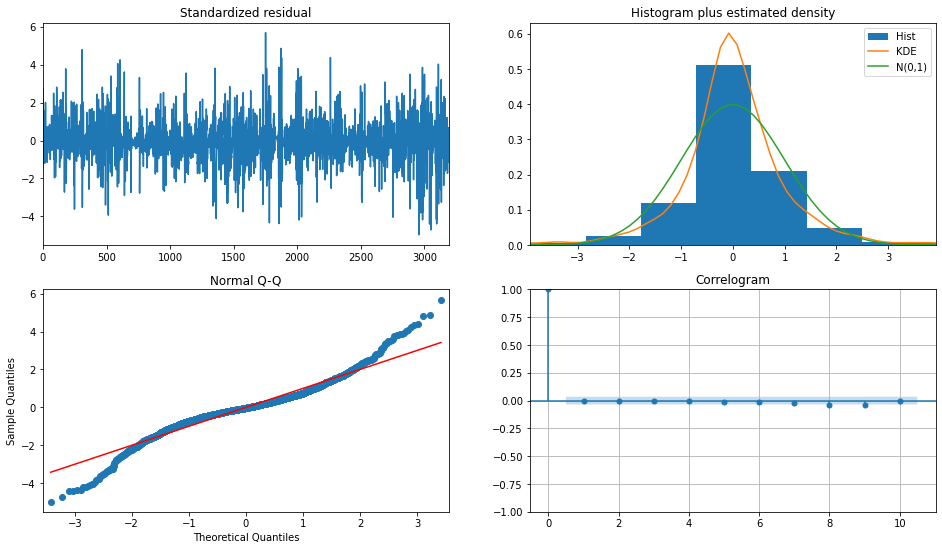

In [13]:
horizon_model_stationary_result.plot_diagnostics(fig=plt.figure(figsize=(16,9)))
plt.grid()
plt.show()

### Stationary = False

In [14]:
horizon_model_result = pm.arima.auto_arima(
                            horizon,
                            start_p=0, d=1, start_q=0,
                            max_p=8, max_d=1, max_q=8,
                            trace=True
                        )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=24154.679, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23961.803, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23824.937, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=24152.679, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=23585.951, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23585.932, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23849.822, Time=0.20 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23585.493, Time=0.77 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23752.058, Time=0.36 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=23574.436, Time=1.23 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=23724.087, Time=0.48 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=23575.885, Time=1.50 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.56 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23587.021, Time=1.23 sec
 ARIMA(5,1,0)(0,0,0)[0] i

In [15]:
# horizon_model_result.summary()

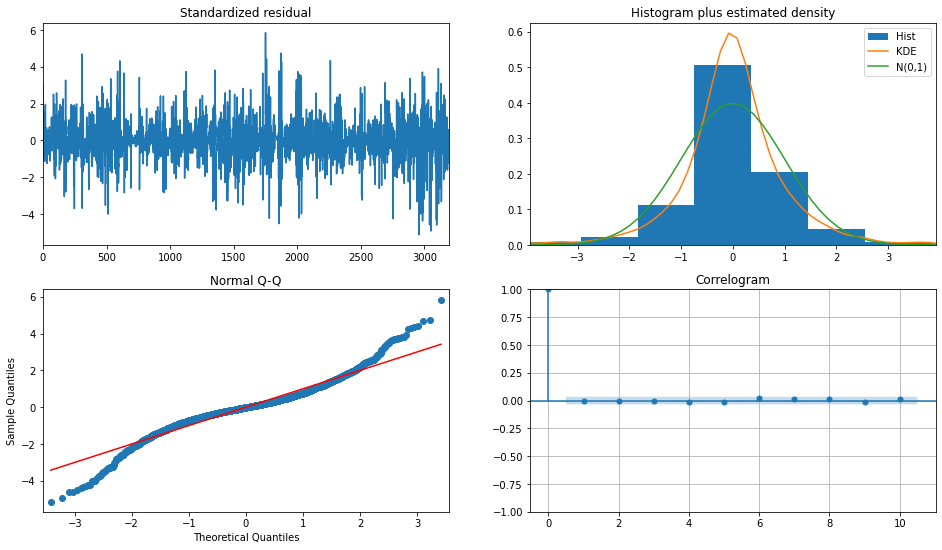

In [16]:
horizon_model_result.plot_diagnostics(fig=plt.figure(figsize=(16,9)))
plt.grid()
plt.show()

### 一次差分

In [17]:
d_horizon = np.diff(horizon)

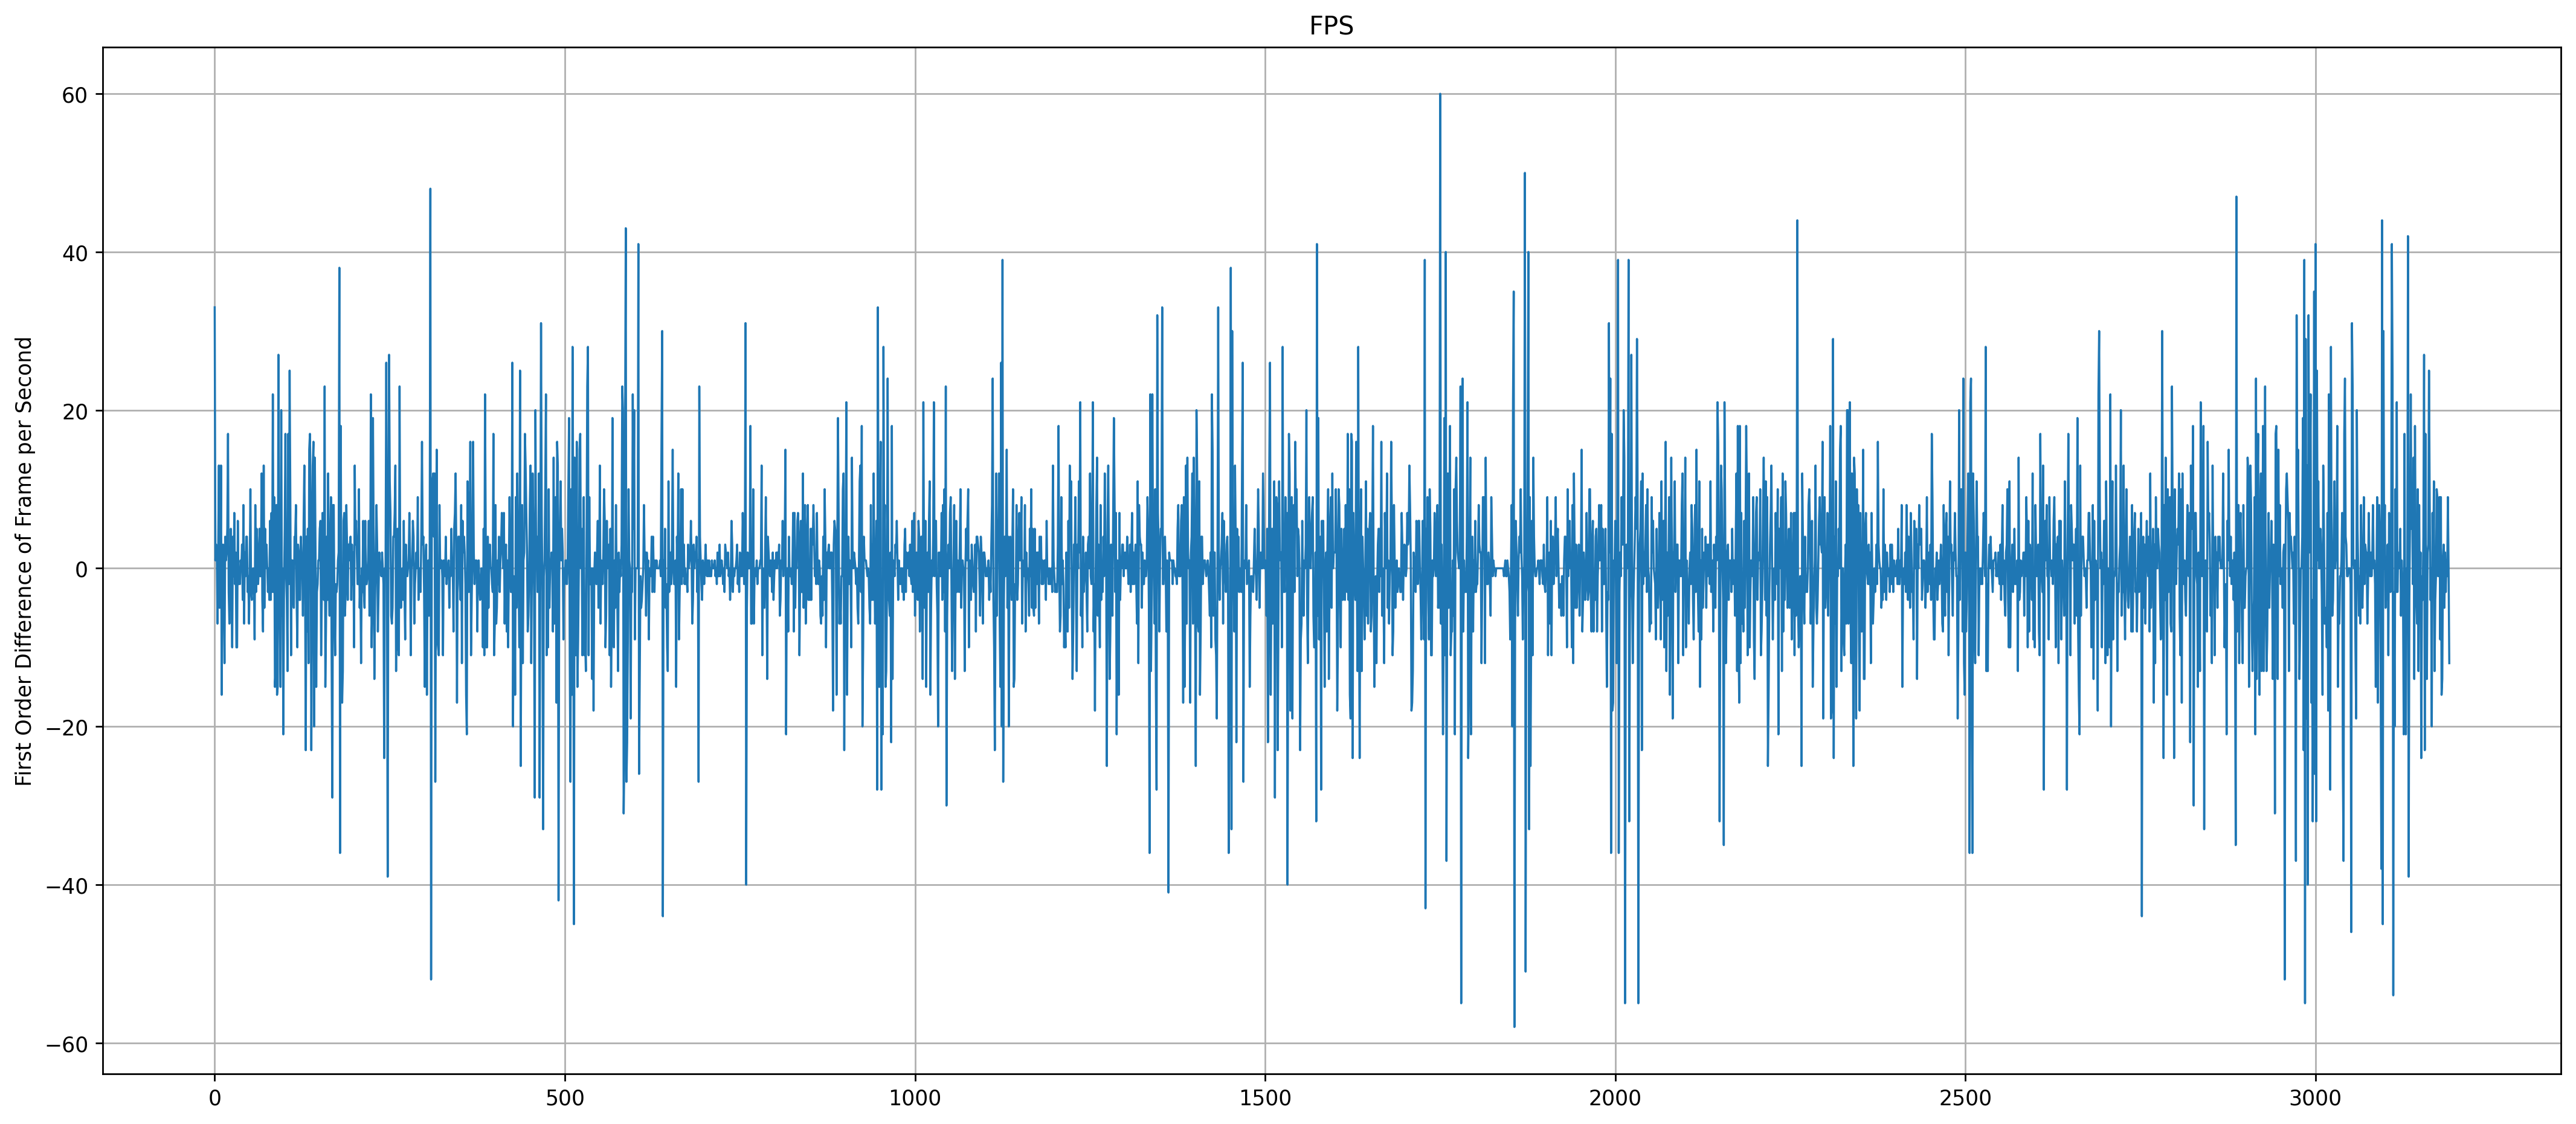

In [18]:
plt.figure(figsize=(21, 9), dpi=250)
plt.plot(d_horizon, linewidth=1)
plt.title("FPS")
plt.ylabel("First Order Difference of Frame per Second")
plt.grid()
plt.show()

In [19]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(d_horizon)
print(f"test statistic: {adf}", f"\np-value: {pvalue}", f"\nThe number of lags used: {usedlag}", sep="")
print(f"The number of observations used: {nobs}")
print(f"Critical Value(1%): {critical_values['1%']}", f"\nCritical Value(5%): {critical_values['5%']}",
      f"\nCritical Value(10%): {critical_values['10%']}", sep="")

test statistic: -20.045246860737745
p-value: 0.0
The number of lags used: 16
The number of observations used: 3175
Critical Value(1%): -3.4324112897035914
Critical Value(5%): -2.8624507519733178
Critical Value(10%): -2.567254814086428


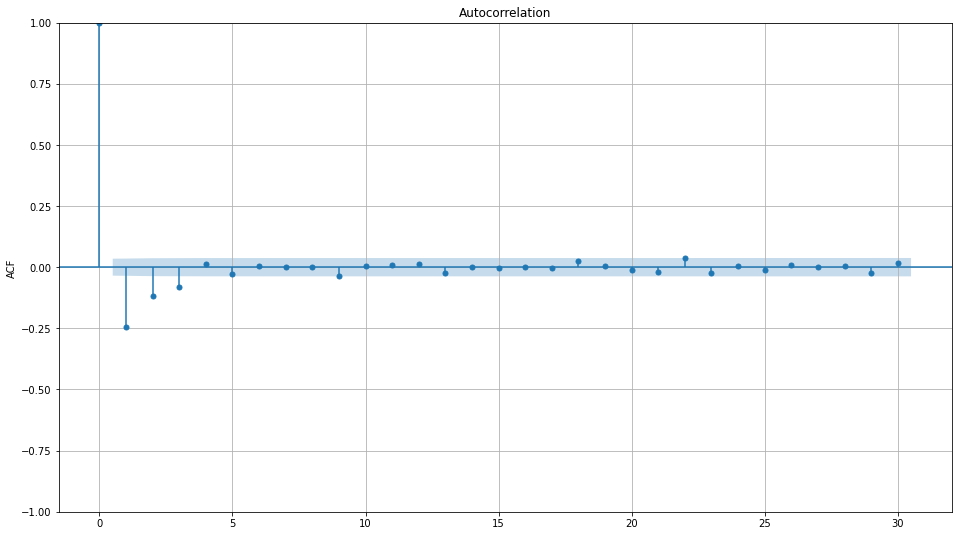

In [20]:
fig_acf, ax_acf = plt.subplots(figsize=(16,9))
plot_acf(d_horizon, lags=30, alpha=0.05, ax=ax_acf)
plt.ylabel("ACF")
plt.grid()
plt.show()

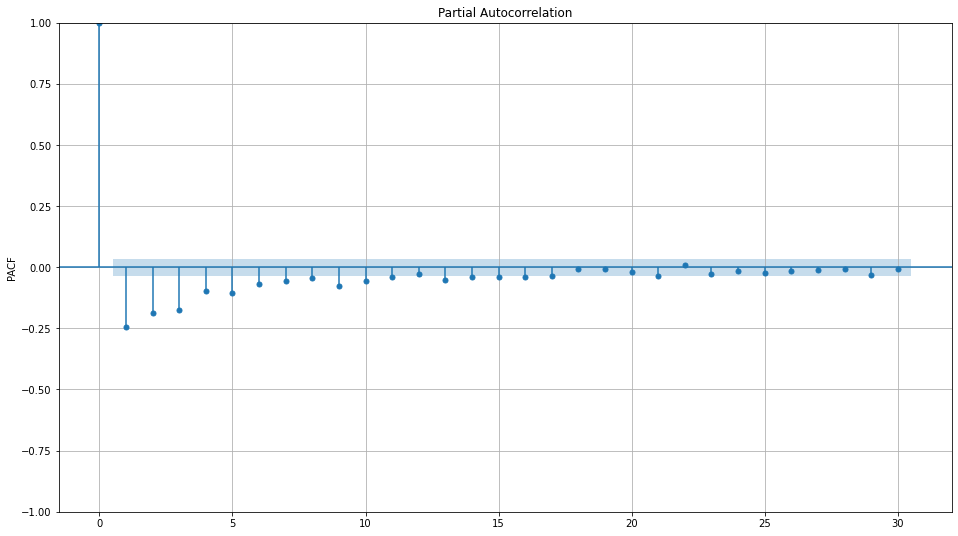

In [21]:
fig_pacf, ax_pacf = plt.subplots(figsize=(16,9))
plot_pacf(d_horizon, lags=30, alpha=0.05, ax=ax_pacf, method="ywm")
plt.ylabel("PACF")
plt.grid()
plt.show()

In [22]:
# fig, (ax_acf, ax_pacf) = plt.subplots(nrows=2, ncols=1, figsize=(16,18), dpi=200)
# plot_acf(horizon, lags=30, alpha=0.05, ax=ax_acf)
# ax_acf.grid()
# plot_pacf(horizon, lags=30, alpha=0.05, ax=ax_pacf, method="ywm")
# ax_pacf.grid()
# plt.show()

statsmodels ARIMA
---

In [23]:
# sm_horizon_model800 = ARIMA(horizon, order=(8,0,0))
# sm_horizon_result800 = sm_horizon_model800.fit()
# sm_horizon_result800.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3193
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -11789.374
Date:                Sat, 14 May 2022   AIC                          23598.748
Time:                        00:55:05   BIC                          23659.435
Sample:                             0   HQIC                         23620.508
                               - 3193                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        137.1768      1.499     91.493      0.000     134.238     140.115
ar.L1          0.6127      0.012     50.607      0.000       0.589       0.636
ar.L2          0.0498      0.015      3.257      0.001       0.020       0.080
ar.L3          0.0295      0.018      1.677      0.094      -0.005       0.064
ar.L4          0.0824      0.018      4.525      0.000       0.047       0.118
ar.L5          0.0095      0.018      0.539      0.590      -0.025       0.044
ar.L6          0.0455      0.019      2.434      0.015       0.009       0.082
ar.L7          0.0227      0.019      1.190      0.234      -0.015       0.060
ar.L8          0.0307      0.016      1.874      0.061      -0.001       0.063
sigma2        94.2763      1.515     62.220      0.000      91.306      97.246
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1778.28
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             0.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

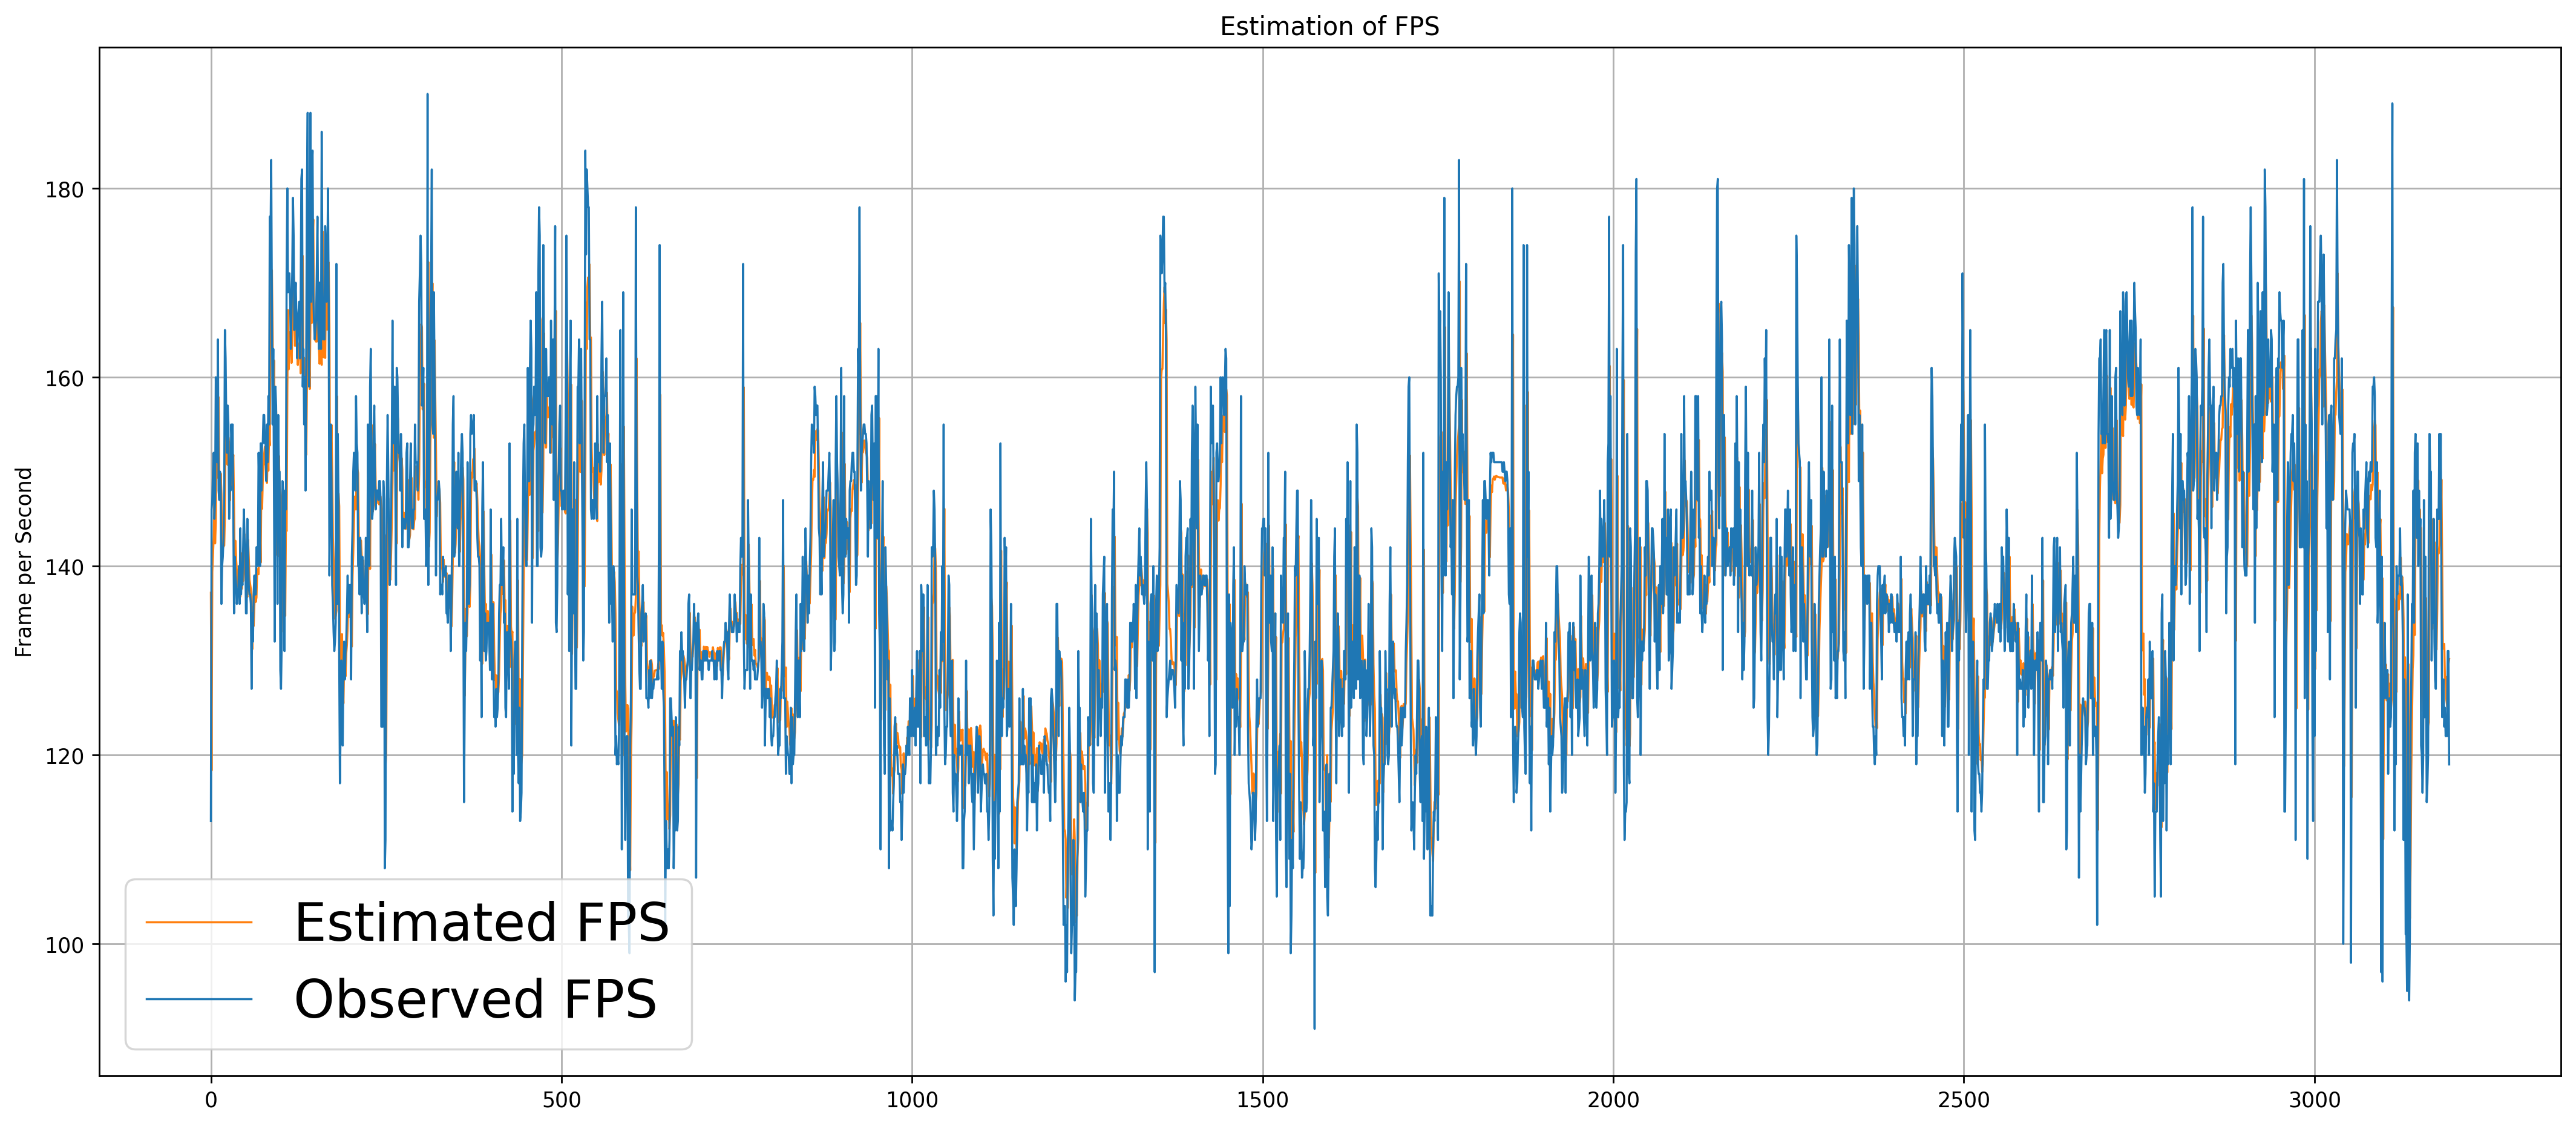

In [24]:
# hat_FPS800 = sm_horizon_result800.predict()
# plt.figure(figsize=(21, 9), dpi=250)
# ts1, = plt.plot(hat_FPS800, linewidth=1, label="Estimated FPS", c='tab:orange')
# ts2, = plt.plot(horizon, linewidth=1, label="Observed FPS", c='tab:blue')
# plt.legend(handles=[ts1, ts2], fontsize=25)
# plt.title("Estimation of FPS")
# plt.ylabel("Frame per Second")
# plt.grid()
# plt.show()

In [25]:
sm_horizon_model411 = ARIMA(horizon, order=(4,1,1), trend='n')
sm_horizon_result411 = sm_horizon_model411.fit()
sm_horizon_result411.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3193
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -11780.232
Date:                Sat, 14 May 2022   AIC                          23572.465
Time:                        00:55:06   BIC                          23608.875
Sample:                             0   HQIC                         23585.520
                               - 3193                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5667      0.014     39.861      0.000       0.539       0.595
ar.L2          0.0326      0.015      2.139      0.032       0.003       0.063
ar.L3          0.0122      0.017      0.704      0.482      -0.022       0.046
ar.L4          0.0728      0.017      4.258      0.000       0.039       0.106
ma.L1         -0.9578      0.008   -125.086      0.000      -0.973      -0.943
sigma2        93.9663      1.443     65.136      0.000      91.139      96.794
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1953.59
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
sm_horizon_result411.impulse_responses()

array([1.        , 0.60889504])

In [27]:
sm_horizon_result411.mae, sm_horizon_result411.mse

(6.679383973988263, 98.00795745994347)

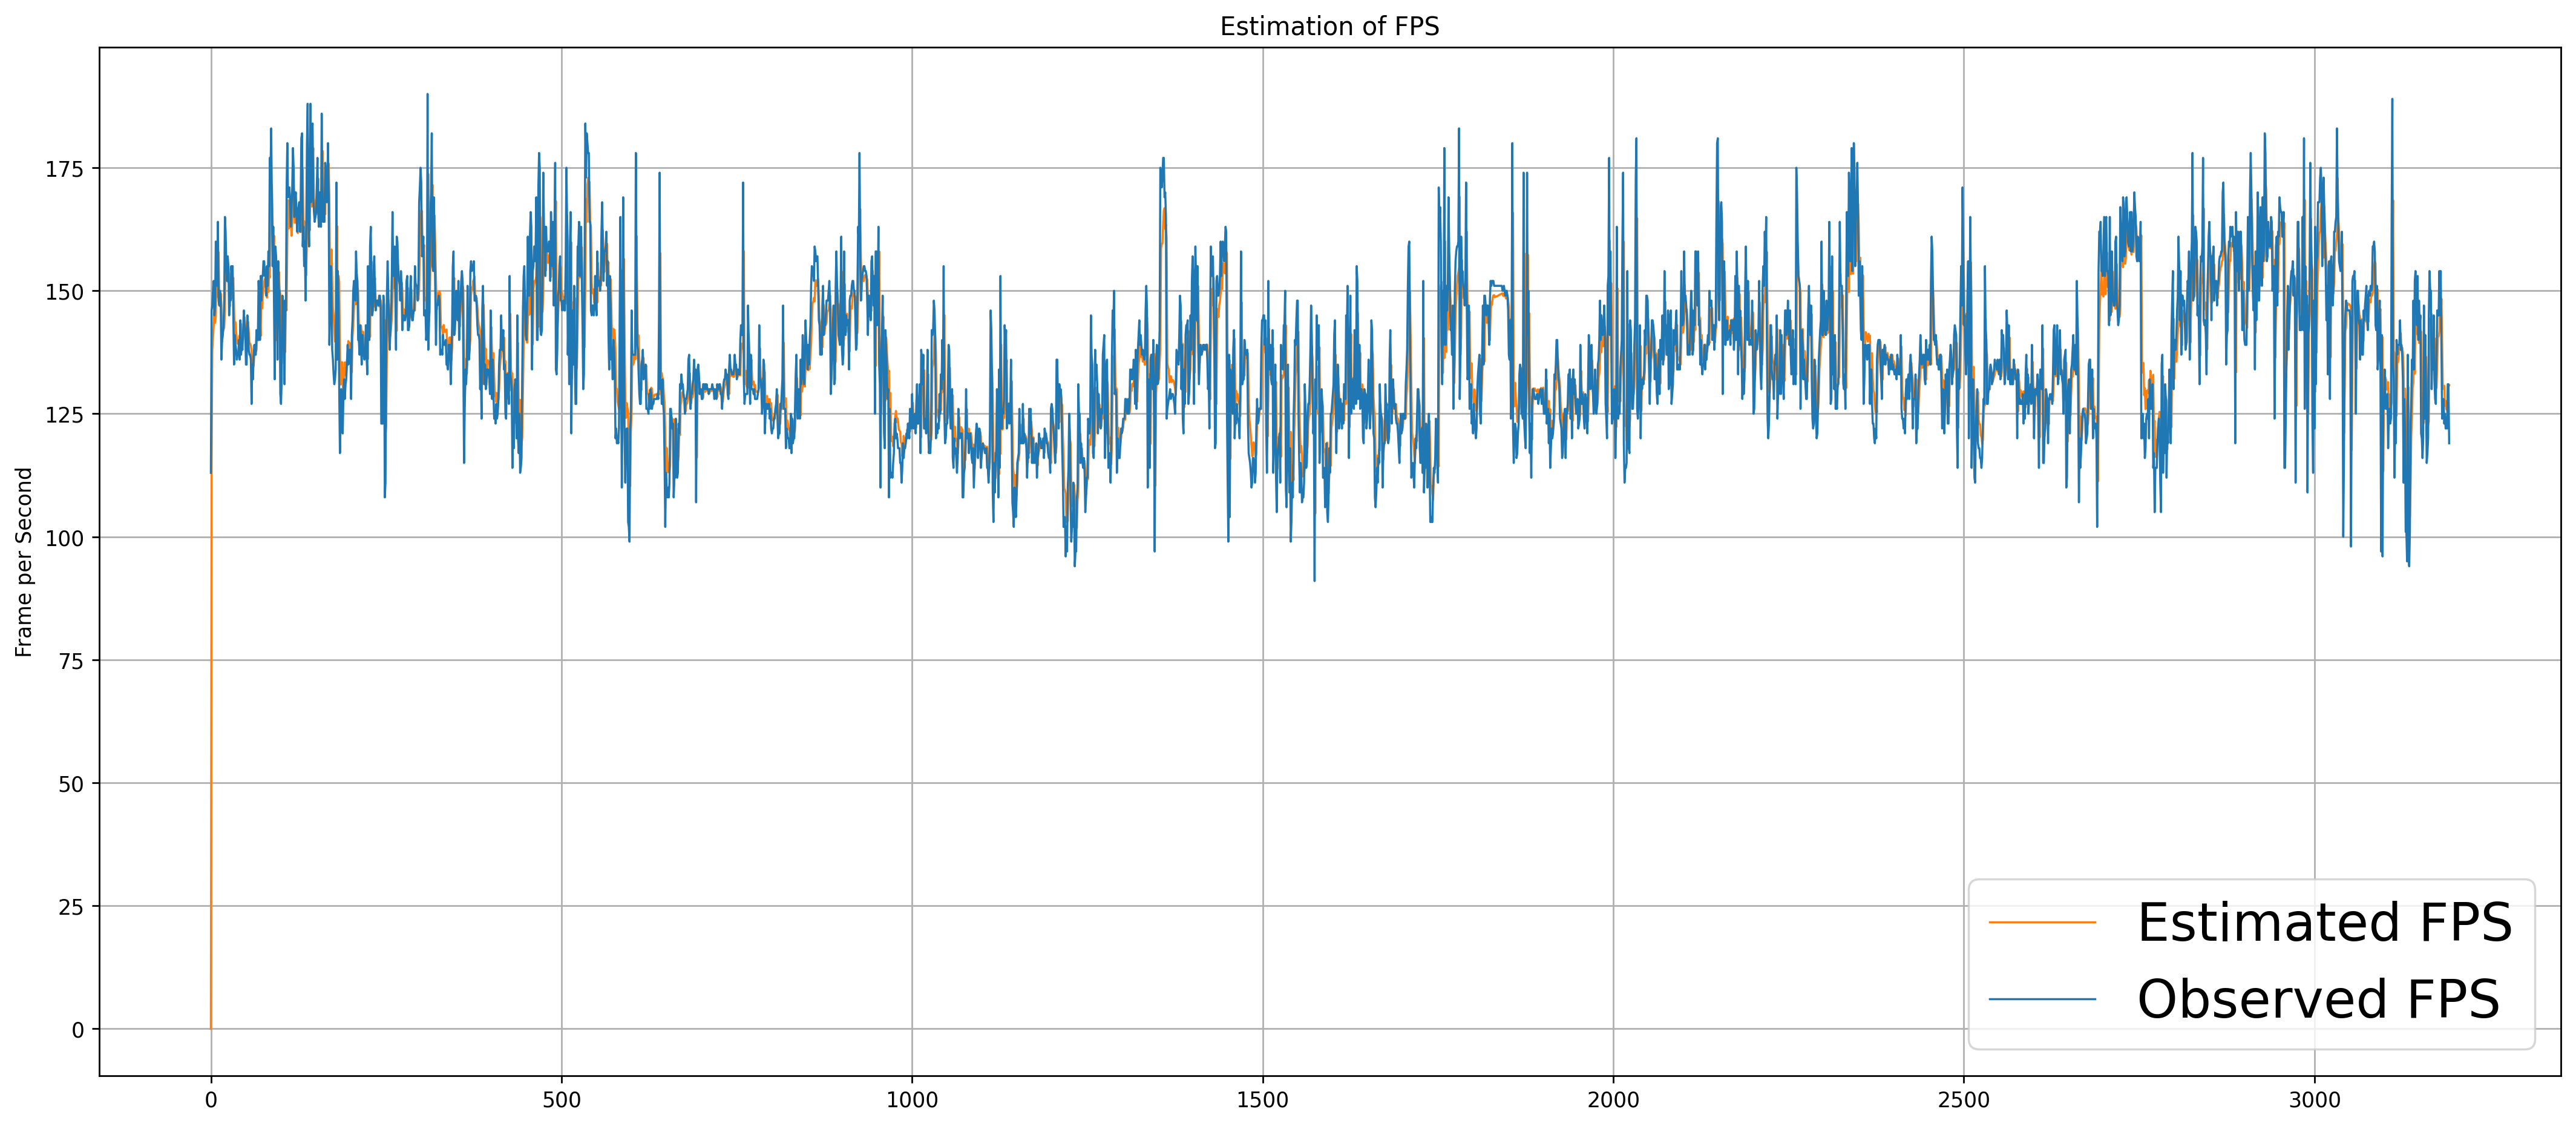

In [28]:
hat_FPS411 = sm_horizon_result411.predict()
plt.figure(figsize=(21, 9), dpi=250)
ts1, = plt.plot(hat_FPS411, linewidth=1, label="Estimated FPS", c='tab:orange')
ts2, = plt.plot(horizon, linewidth=1, label="Observed FPS", c='tab:blue')
plt.legend(handles=[ts1, ts2], fontsize=25)
plt.title("Estimation of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

In [29]:
sm_horizon_model114 = ARIMA(horizon, order=(1,1,4))
sm_horizon_result114 = sm_horizon_model114.fit()
sm_horizon_result114.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3193
Model:                 ARIMA(1, 1, 4)   Log Likelihood              -11799.080
Date:                Sat, 14 May 2022   AIC                          23610.161
Time:                        00:55:07   BIC                          23646.571
Sample:                             0   HQIC                         23623.216
                               - 3193                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9329      0.117     -7.991      0.000      -1.162      -0.704
ma.L1          0.5463      0.117      4.653      0.000       0.316       0.776
ma.L2         -0.5654      0.047    -12.153      0.000      -0.657      -0.474
ma.L3         -0.3322      0.027    -12.339      0.000      -0.385      -0.279
ma.L4         -0.1233      0.027     -4.638      0.000      -0.175      -0.071
sigma2        95.0879      1.428     66.583      0.000      92.289      97.887
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              2006.74
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
sm_horizon_result114.impulse_responses()

array([1.        , 0.61337453])

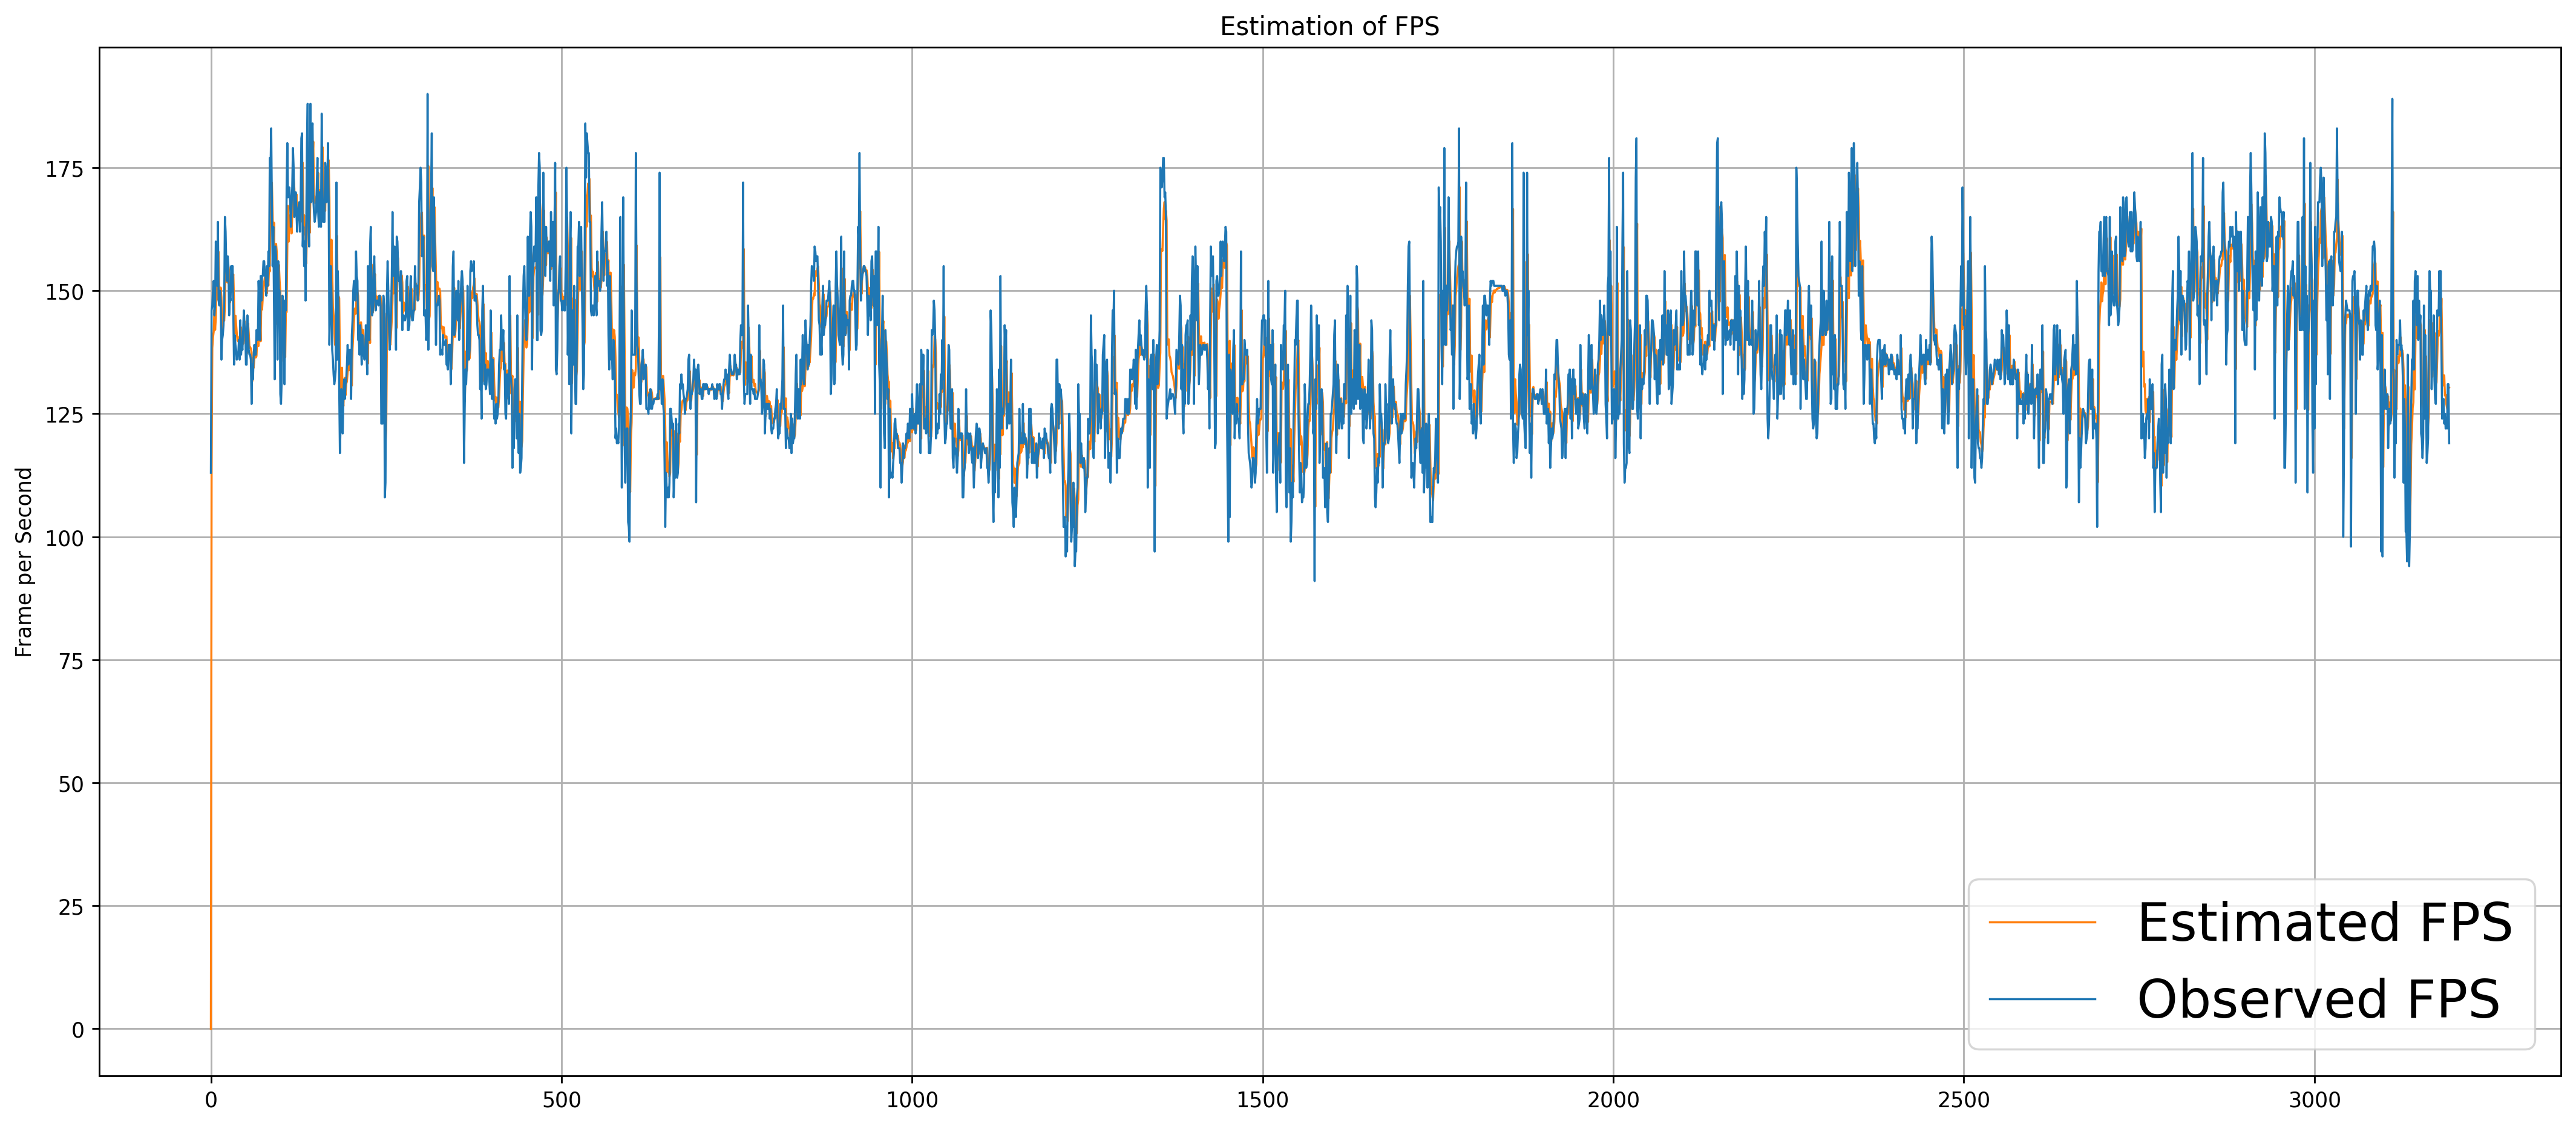

In [31]:
hat_FPS114 = sm_horizon_result114.predict()
plt.figure(figsize=(21, 9), dpi=250)
ts1, = plt.plot(hat_FPS114, linewidth=1, label="Estimated FPS", c='tab:orange')
ts2, = plt.plot(horizon, linewidth=1, label="Observed FPS", c='tab:blue')
plt.legend(handles=[ts1, ts2], fontsize=25)
plt.title("Estimation of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

In [32]:
sm_horizon_model113 = ARIMA(horizon, order=(1,1,3))
sm_horizon_result113 = sm_horizon_model113.fit()
sm_horizon_result113.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3193
Model:                 ARIMA(1, 1, 3)   Log Likelihood              -11784.076
Date:                Sat, 14 May 2022   AIC                          23578.152
Time:                        00:55:08   BIC                          23608.494
Sample:                             0   HQIC                         23589.031
                               - 3193                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8077      0.030     27.157      0.000       0.749       0.866
ma.L1         -1.2068      0.032    -37.875      0.000      -1.269      -1.144
ma.L2          0.1249      0.021      5.862      0.000       0.083       0.167
ma.L3          0.1060      0.020      5.294      0.000       0.067       0.145
sigma2        94.1909      1.451     64.897      0.000      91.346      97.036
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):              1907.29
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

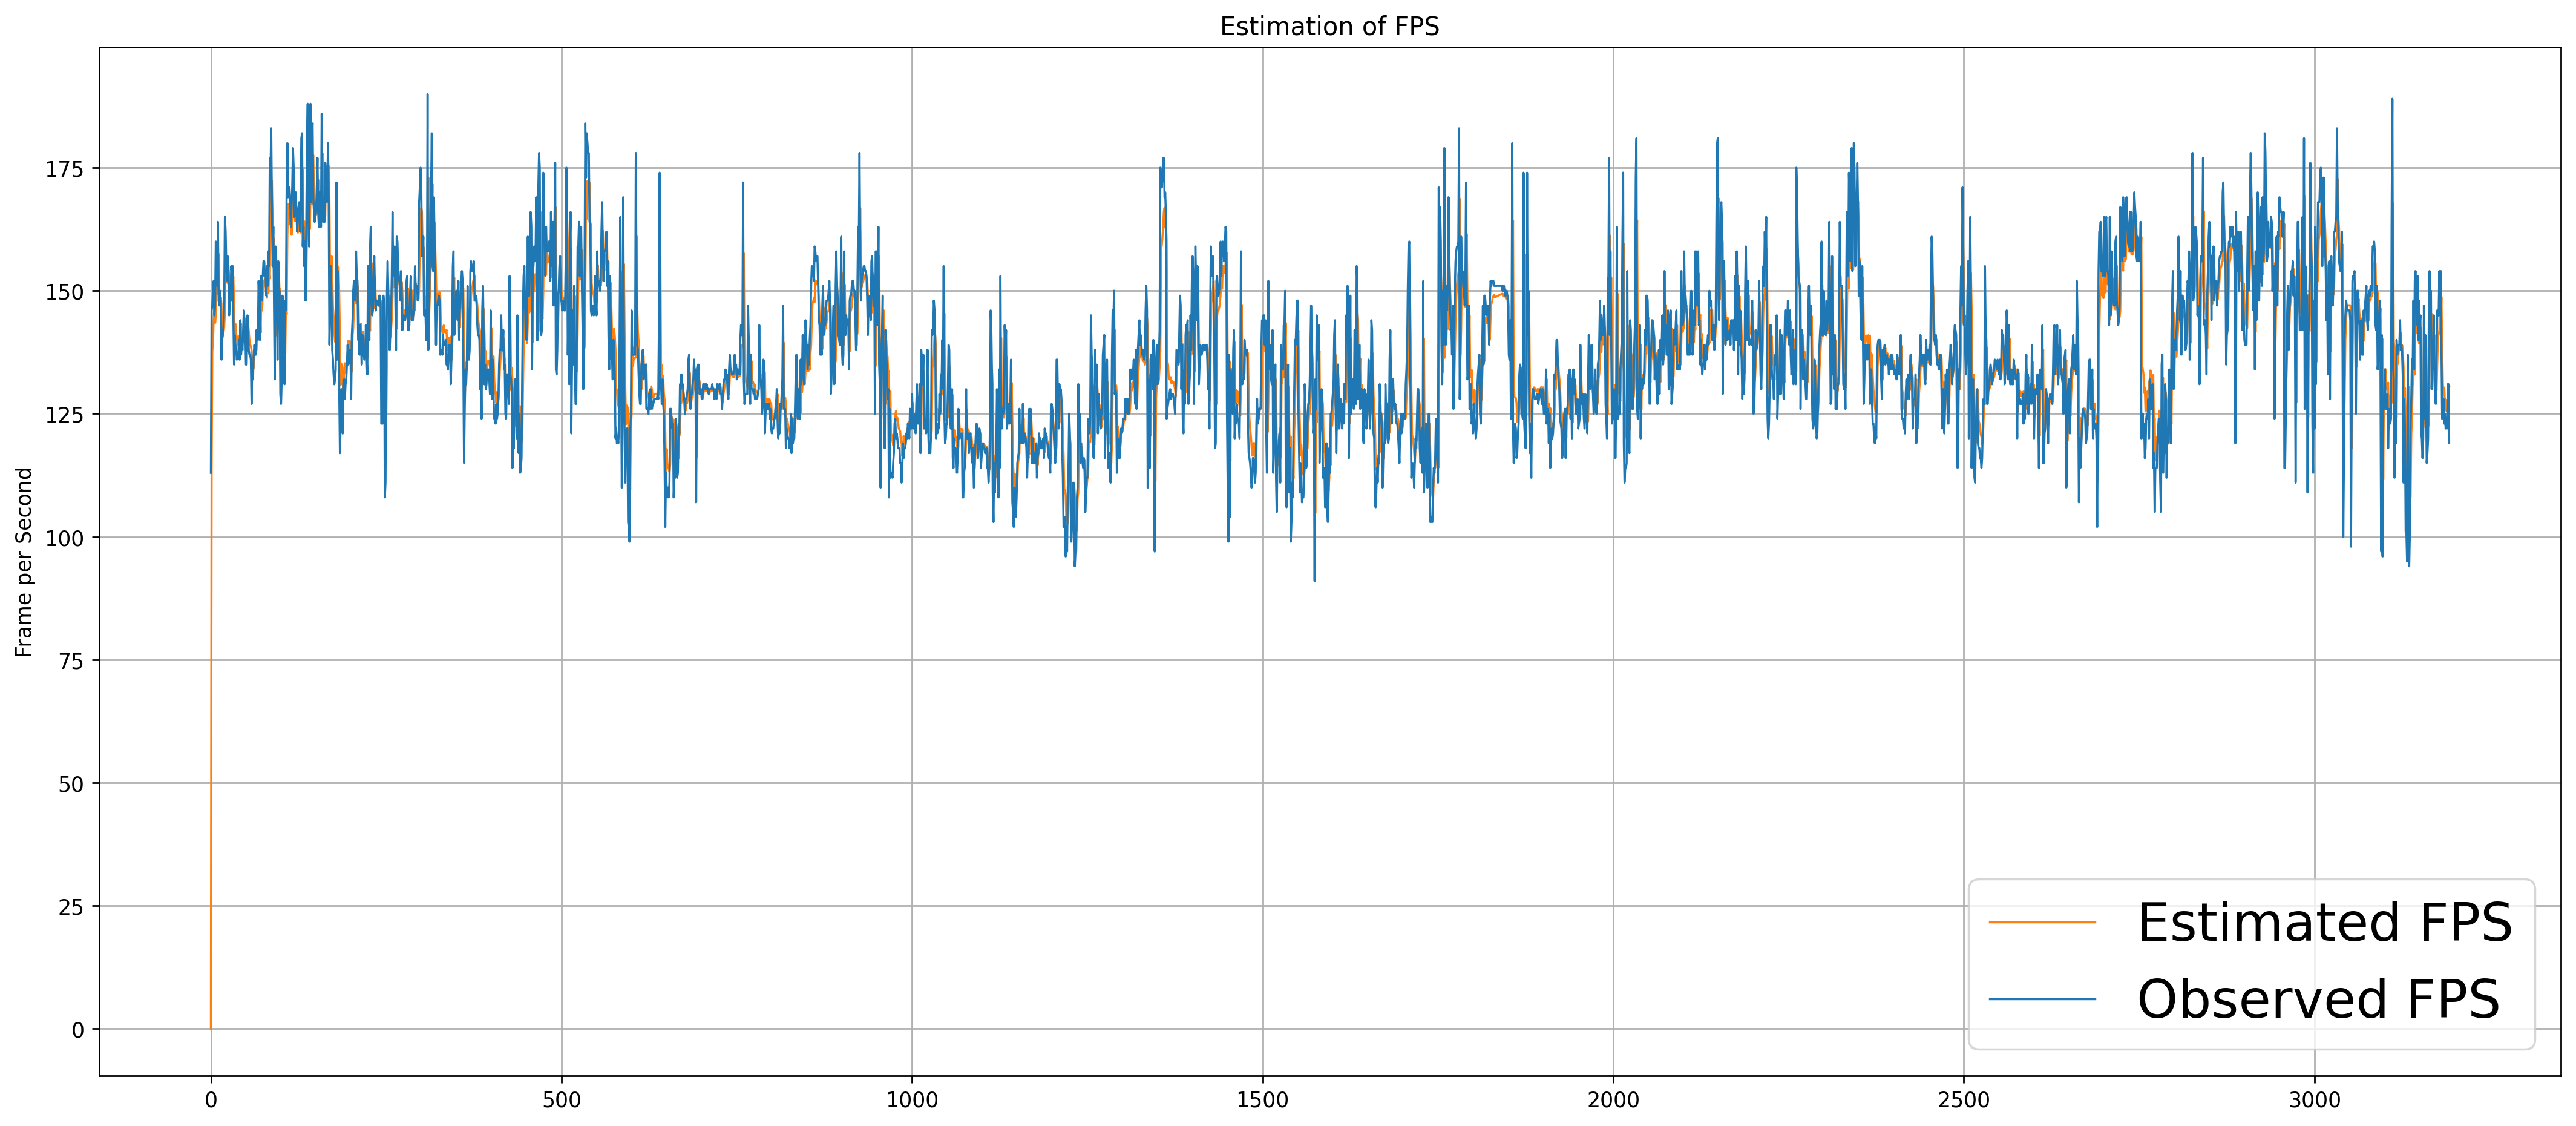

In [33]:
hat_FPS113 = sm_horizon_result113.predict()
plt.figure(figsize=(21, 9), dpi=250)
ts1, = plt.plot(hat_FPS113, linewidth=1, label="Estimated FPS", c='tab:orange')
ts2, = plt.plot(horizon, linewidth=1, label="Observed FPS", c='tab:blue')
plt.legend(handles=[ts1, ts2], fontsize=25)
plt.title("Estimation of FPS")
plt.ylabel("Frame per Second")
plt.grid()
plt.show()

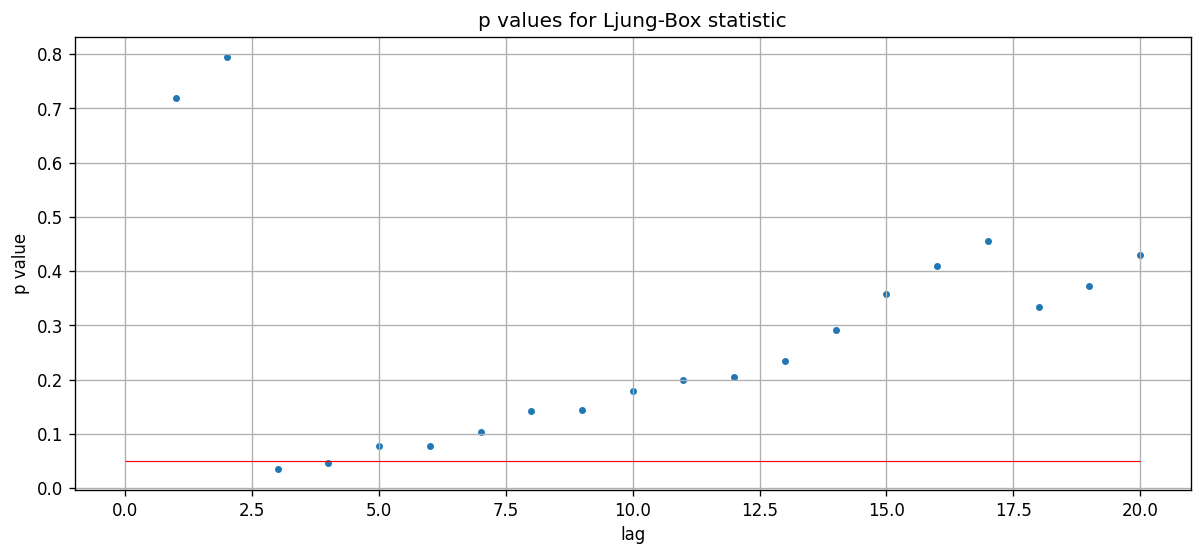

In [34]:
plt.figure(figsize=(12, 5), dpi=120)
plt.scatter(list(range(1,21)), sm_horizon_result113.test_serial_correlation(method="ljungbox", lags=20)[0, 1, :], s=10)
plt.hlines(y=[0.05], xmin=0, xmax=20, colors="r", linewidths=0.7)
# plt.axis([0, 20, 0, 1])
plt.title("p values for Ljung-Box statistic")
plt.xlabel("lag")
plt.ylabel("p value")
plt.grid()
plt.show()

In [35]:
sm_horizon_result113.impulse_responses()

array([1.        , 0.60095216])

In [36]:
arma2ma(
    ar=sm_horizon_result113.arparams,
    ma=sm_horizon_result113.maparams,
    lags=3
)

array([-1.49404225,  0.15461115,  0.13123254])